Autoencoder (автокодер, автоэнкодер, AE) — нейронная сеть, которая копирует входные данные на выход. По архитектуре похож на персептрон. Автоэнкодеры сжимают входные данные для представления их в latent-space (скрытое пространство), а затем восстанавливают из этого представления output (выходные данные). Цель — получить на выходном слое отклик, наиболее близкий к входному.

Отличительная особенность автоэнкодеров — количество нейронов на входе и на выходе совпадает.

Автокодер состоит из двух частей:

Энкодер: отвечает за сжатие входа в latent-space. Представлен функцией кодирования h = f (x);
Декодер: предназначеа для восстановления ввода из latent-space. Представлен функцией декодирования h = f (x).
Архитектура автокодеров
Архитектура автоэнкодера
Таким образом, автокодер описывают функцией g (f (x)) = r, где r совпадает с изначальным x на входе.

Зачем копировать вход на выход
Если бы единственной задачей автоэнкодеров было копирование входных данных на выход, они были бы бесполезны. Исследователи рассчитывают на то, что скрытое представление h будет обладать полезными свойствами.

Этого добиваются созданием ограничений для задачи копирования. Один из способов получить полезные результаты от автоэнкодера — ограничить h размерами меньшими , чем x. D этом случае автокодирование называется неполным.

Автоэнкодер может начать выполнять задачу копирования, не извлекая полезной информации о распределении данных, если

размерность скрытого представления совпадает с размерностью входа;
размерность скрытого представления больше, чем размерность входа;
автоэнкодеру предоставляется слишком большой объем данных.
В этих случаях даже линейный кодер и линейный декодер копируют входные данные на выход, не изучая ничего полезного о распределении.

В идеале можно организовать любую архитектуру автокодера, задавая размер кода и емкость энкодера и декодера на основе сложности моделируемого распределения.

Типы автоэнкодеров
В этой заметке будут описаны четыре следующих типа автокодеров:

Автокодер Vanilla;
Многослойный автокодер;
Сверточный автокодер;
Регуляризованный.


Давайте реализуем относительно простой автоэнкодер в виде многосвязной НС для представления изображений цифр из БД MNIST, с которой ранее мы уже работали. На этом примере мы наглядно увидим результат использования сложной нелинейной модели.


In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
 

# загружаем цифры из базы MNIST        
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255
 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\evgen\appd

In [2]:

# Опишем архитектуру нашего автоэнкодера:
input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)
 
d = Dense(64, activation='relu')(encoded)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)
 
autoencoder = keras.Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
# Обучим Автоэнкодер

batch_size = 49

autoencoder.fit(x_train, 
                x_train, 
                epochs=20,
                batch_size=batch_size,
                shuffle=True)


Epoch 1/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0335
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0165
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0135
Epoch 4/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0119
Epoch 5/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0108
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0101
Epoch 7/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0095
Epoch 8/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0090
Epoch 9/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0087
Epoch 10/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0084
Epoch 11/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0081
Epoch 12/20
60000/60000 [=====

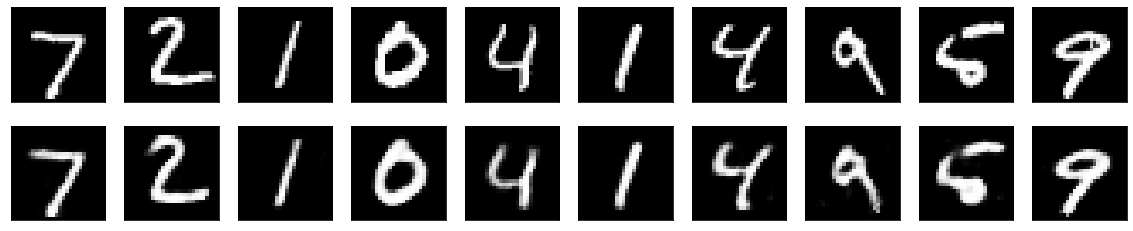

In [4]:
# Отобразим первые 10 изображений 
# и результат их декодирования нашим обученным автоэнкодером:

n = 10
 
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)
 
plt.figure(figsize=(2*n, 2*2))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
 
  ax2 = plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

In [5]:

#  Функция отображения цифр, которые получаются гомотопией 
# между двумя изображениями пятерок по прямой

def plot_digits(*images):
    images = [x.squeeze() for x in images]
    n = min([x.shape[0] for x in images])
 
    plt.figure(figsize=(2*n, 2*len(images)))
    for j in range(n):
        for i in range(len(images)):
            ax = plt.subplot(len(images), n, i*n + j + 1)
            plt.imshow(images[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
 
    plt.show()
 
def plot_homotopy(frm, to, n=10, autoencoder=None):
    z = np.zeros(([n] + list(frm.shape)))
    for i, t in enumerate(np.linspace(0., 1., n)):
        z[i] = frm * (1-t) + to * t  # Гомотопия по прямой
    if autoencoder: 
        plot_digits(autoencoder.predict(z, batch_size=n))
    else:
        plot_digits(z)

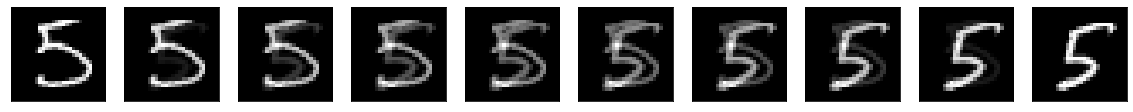

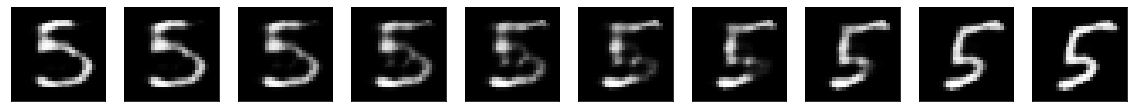

In [6]:
# Проверка работы
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)

Детектирование аномалий с помощью автоенкодеров на Python

Детектирование аномалий — интересная задача машинного обучения. Не существует какого-то определенного способа ее решения, так как каждый набор данных имеет свои особенности. Но в то же время есть несколько подходов, которые помогают добиться успеха. Я хочу рассказать про один из таких подходов — автоенкодеры.



In [7]:
# импортируем библиотеки
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [8]:
# функция для генерации нормального распределения с заданными параметрами
def gen_normal_distribution(mu, sigma, size, range=(0, 1), max_val=1):
  bins = np.linspace(*range, size)
  result = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-(bins - mu)**2 / (2*sigma**2))

  cur_max_val = result.max()
  k = max_val / cur_max_val

  result *= k

  return result

1.0


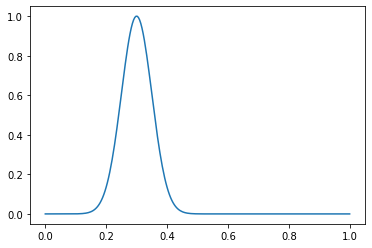

In [9]:
# Создадим выборку нормального распределения с μ = 0.3 и σ = 0.05:
dist = gen_normal_distribution(0.3, 0.05, 256, max_val=1)
print(dist.max())

plt.plot(np.linspace(0, 1, 256), dist)

In [10]:
# Зададим параметры Датасета
in_distribution_size = 2000
out_distribution_size = 200
val_size = 100
sample_size = 256

# для воспроизводимости используется seed
random_generator = np.random.RandomState(seed=42) 

In [11]:
# Функции для генерирования примеров — нормальных и аномальных. 
# Нормальными будут считаться распределения с одним максимумом, аномальными — с двумя:

def generate_in_samples(size, sample_size):
  global random_generator

  in_samples = np.zeros((size, sample_size))

  in_mus = random_generator.uniform(0.1, 0.9, size)
  in_sigmas = random_generator.uniform(0.05, 0.5, size)

  for i in range(size):
    in_samples[i] = gen_normal_distribution(in_mus[i], in_sigmas[i], 
                                            sample_size, max_val=1)

  return in_samples

def generate_out_samples(size, sample_size):
  global random_generator

  # создаем распределение с одним пиком
  out_samples = generate_in_samples(size, sample_size)

  # накладываем поверх него еще один небольшой максимум
  out_additional_mus = random_generator.uniform(0.1, 0.9, size)
  out_additional_sigmas = random_generator.uniform(0.01, 0.05, size)

  for i in range(size):
    anomaly = gen_normal_distribution(out_additional_mus[i], 
                                      out_additional_sigmas[i], 
                                      sample_size, max_val=0.12)
    out_samples[i] += anomaly

  return out_samples

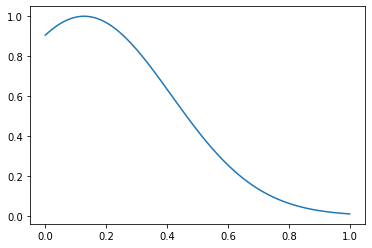

In [12]:
# нормальный пример:
in_samples = generate_in_samples(in_distribution_size, sample_size)
plt.plot(np.linspace(0, 1, sample_size), in_samples[42])

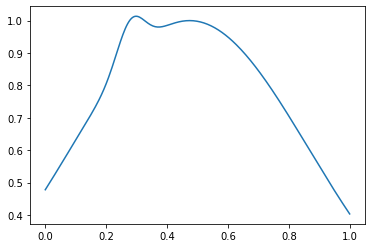

In [13]:
# аномальный тип:
out_samples = generate_out_samples(out_distribution_size, sample_size)
plt.plot(np.linspace(0, 1, sample_size), out_samples[42])

In [14]:
# Создадим массивы с признаками и метками:
x = np.concatenate((in_samples, out_samples))
# нормальные примеры имеют метку 0, аномальные -- 1
y = np.concatenate((np.zeros(in_distribution_size), np.ones(out_distribution_size)))

# разделение на обучающую/тренировочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

In [15]:
# проверим несколько алгоритмов детектирования аномалий из Sklearn: 
# одноклассовый SVM и изолирующий лес.

# функции для оценки качества моделей
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score



In [16]:
# One class SVM
from sklearn.svm import OneClassSVM

In [17]:
# OneClassSVM позволяет задать параметр nu — долю аномальных объектов в выборке.

out_dist_part = out_distribution_size / (out_distribution_size + in_distribution_size)
svm = OneClassSVM(nu=out_dist_part)
svm.fit(x_train, y_train)


OneClassSVM(nu=0.09090909090909091)

In [18]:
# Делаем предсказания на тестовом наборе:
svm_prediction = svm.predict(x_test)
svm_prediction[svm_prediction == 1] = 0
svm_prediction[svm_prediction == -1] = 1

In [19]:
# classification_report, функция которая позволяет оценить  важные для Anomaly detection метрики,
# как precision и recall, причем для каждого класса:
print(classification_report(y_test, svm_prediction))


              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       400
         1.0       0.29      0.33      0.31        40

    accuracy                           0.87       440
   macro avg       0.61      0.62      0.62       440
weighted avg       0.87      0.87      0.87       440



In [20]:
# Подргузим Isolation forest
from sklearn.ensemble import IsolationForest

In [21]:

# зададим параметр, отвечающий за долю аномальных объектов в выборке
out_dist_part = out_distribution_size / (out_distribution_size + in_distribution_size)

iso_forest = IsolationForest(n_estimators=100, contamination=out_dist_part, max_features=100, n_jobs=-1)
iso_forest.fit(x_train)

IsolationForest(contamination=0.09090909090909091, max_features=100, n_jobs=-1)

In [22]:
# выведем Classification report
iso_forest_prediction = iso_forest.predict(x_test)
iso_forest_prediction[iso_forest_prediction == 1] = 0
iso_forest_prediction[iso_forest_prediction == -1] = 1

print(classification_report(y_test, iso_forest_prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       400
         1.0       0.08      0.10      0.09        40

    accuracy                           0.81       440
   macro avg       0.49      0.49      0.49       440
weighted avg       0.83      0.81      0.82       440



In [23]:
# Попробуем найти аномалии случайным лесом
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_features=100, n_jobs=-1)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_features=100, n_jobs=-1)

In [24]:
random_forest_prediction = random_forest.predict(x_test)
print(classification_report(y_test, random_forest_prediction))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       400
         1.0       1.00      0.28      0.43        40

    accuracy                           0.93       440
   macro avg       0.97      0.64      0.70       440
weighted avg       0.94      0.93      0.92       440




Autoencoder

В общем, случилась довольно обыденная для детектирования аномалий штука: ничего не сработало. Переходим к автокодировщикам.


Принцип работы автоенкодера состоит в том, что модель пытается сначала "сжать" данные, а потом восстановить их. Она состоит из 2 частей: Encoder'а и Decoder'а, которые занимаются сжатием и расшифровкой соответственно.

Чтобы создать эффект "сжатия" данных, надо уменьшить скрытые слои, заставив их обрабатывать большее количество информации меньшим количеством нейронов.

Как этот эффект поможет нам? Теория информации говорит о том, что чем более вероятно событие, тем меньшее количество информации потребуется, чтобы описать это событие. Вспомним, что у нас всего лишь 9% аномалий и 91% нормальных объектов. Тогда для хранения информации об обычных объектах потребуется меньше информации, чем для запоминания аномальных. Но тогда, если мы подберем правильные параметры нейронной сети, то она сможет запоминать и восстанавливать только обычные объекты: на аномальные ей просто не будет хватать обобщающей способности.

Поэтому восстановленные моделью данные будут значительно отличаться от исходных.